clustering the countries by using K-means, Herarichical and PCA for HELP international

objective:To categorical the countries using socio-economic and health factors that determine the overall development of the country .
    
    

About organization: HELP international is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disaster and natural calamities.

Problem statement:HELP international have been able to raise around $ 10 million.Now the CEO of the NGO needs to decide how to use this money startigically and effectively.So, CEO has to make decision to choose the countries that are in the direst need of aid.Hence,My job as a data analyst is to categorical the countries using some socio-economic and health factors that determine the overall development of hte country. Then i need to suggest the countries which the CEO needs to focus on most 

In [151]:
import numpy as np # linear algebera
import pandas as pd # data processing csv
import seaborn as sns # data visualization 
import matplotlib.pyplot as plt # data visualization 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale # for scaling the data
from sklearn.cluster import KMeans # To perform K - means clustring 
from sklearn.decomposition import PCA # TO oerform PCA
# TO perform hierarichel clustering 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [152]:
data_main = pd.read_csv("C:\\Users\\arvin\\downloads\\Country-data.csv")
data_main.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [153]:
data_main.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [154]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [155]:
data_main.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [156]:
data_main.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


EDA:


Exploratory Data Analytics(EDA) is a good practise to understand distribution  of the data, analyize the trends & patterns in data, and gather insight from it.

In [157]:
data_main.shape

(167, 10)

In [158]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


The data contains 167 countries and 9 features. 10th column contains the names of the countries.'country'column will not be needed in EDA and modelling.

In [159]:
data = data_main.drop(columns = 'country')

In [160]:
# checking for null values
data.isnull().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

Data does not have any null values and all the columns have continous numerical values. There are no categorical columns.

In [161]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


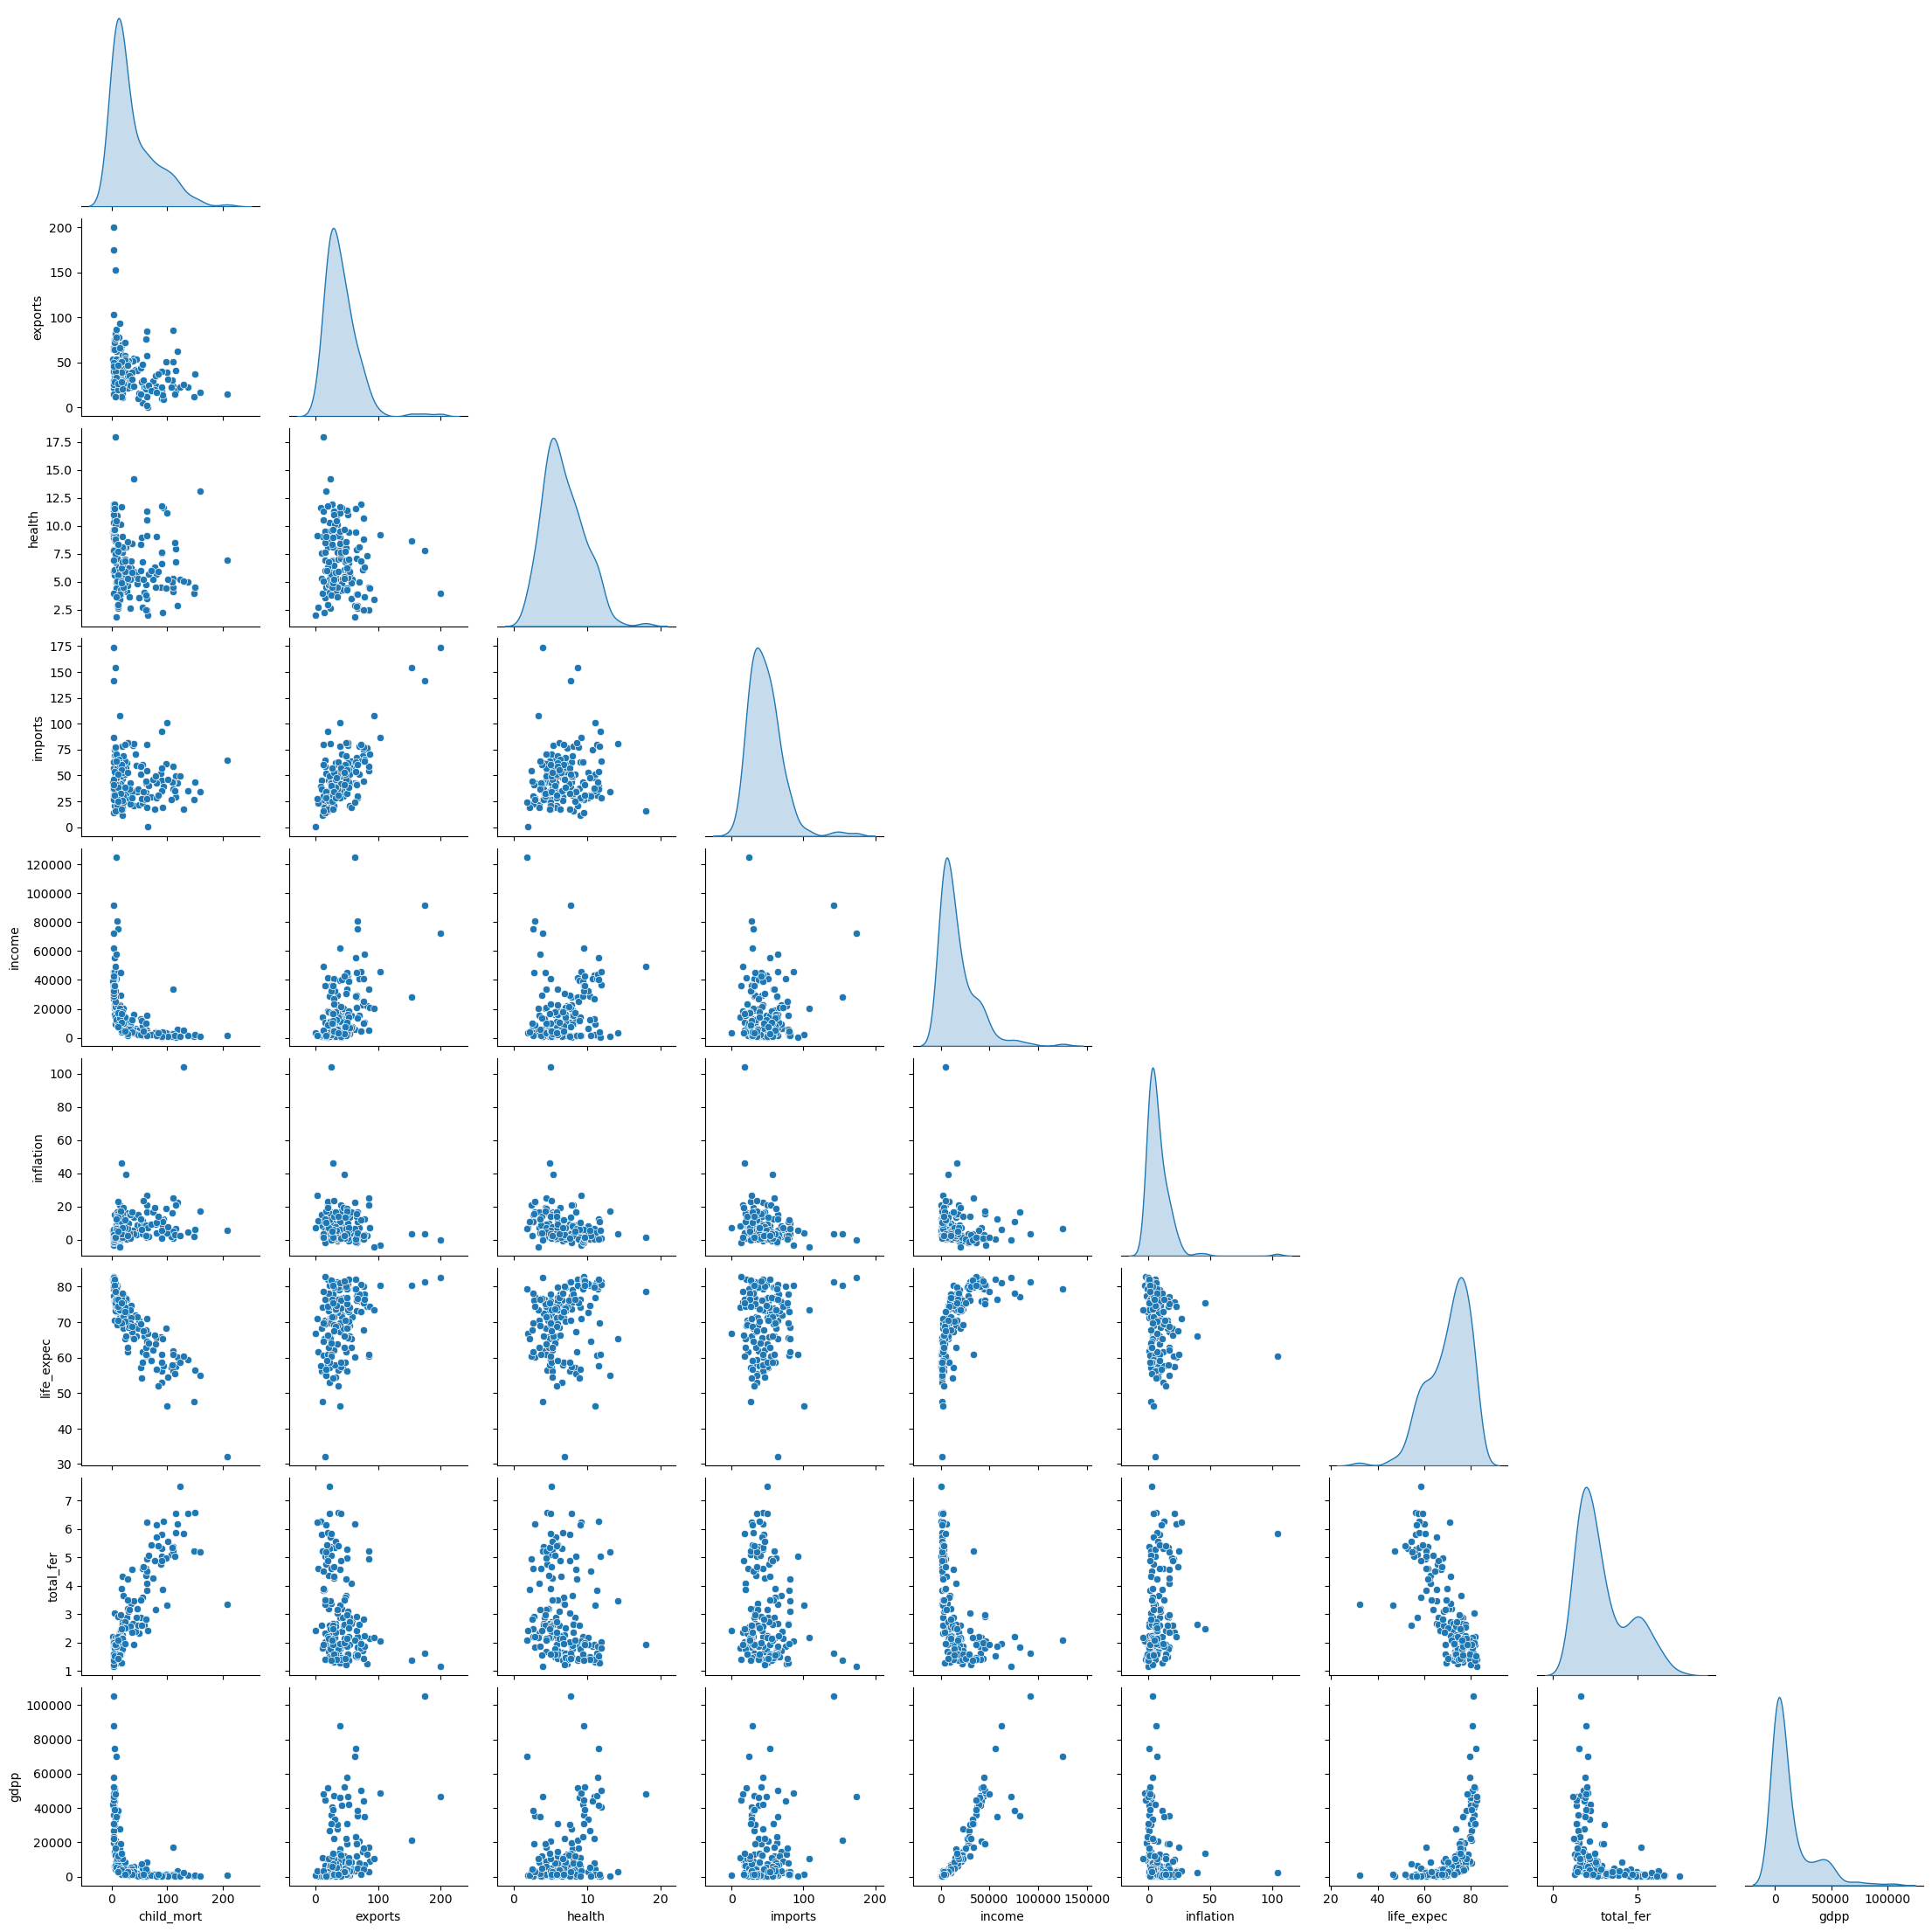

In [162]:
sns.pairplot(data, diag_kind = 'kde', corner = True)

Histogram

Scatter Plot:

<AxesSubplot:>

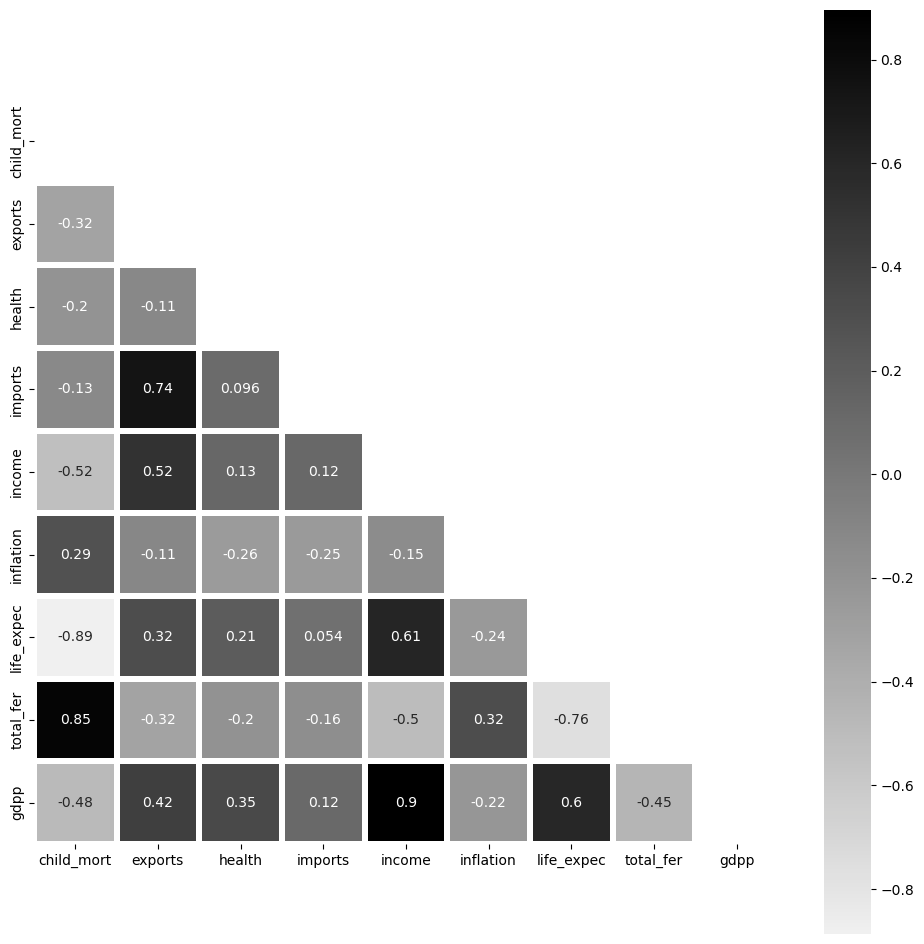

In [163]:
corr = data.corr()
mask =np.triu(np.ones_like(corr, dtype = np.bool))
plt.rcParams['figure.figsize'] =12, 12
cmap = sns.light_palette('black', as_cmap = True)
sns.heatmap(corr, mask = mask, center = 0, cmap = cmap, square = True, annot = True, linewidth = 3)

Standardization:

THis transform the data to a uniform scale, this will creat consistency across the fields in DataFrame .
if one feature has very large values, its will dominate over other features when calcuating the distance. So Standarization gives all features the same influence on the distance metric.

In [164]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
sData = pd.DataFrame(scale.fit_transform(data), columns = data.columns) # Scaled Data 
sData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-2.659217e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.383323e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.218713e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.871954e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.512288e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,3.988825e-18,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.616535e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.124580e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,2.127373e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


<AxesSubplot:>

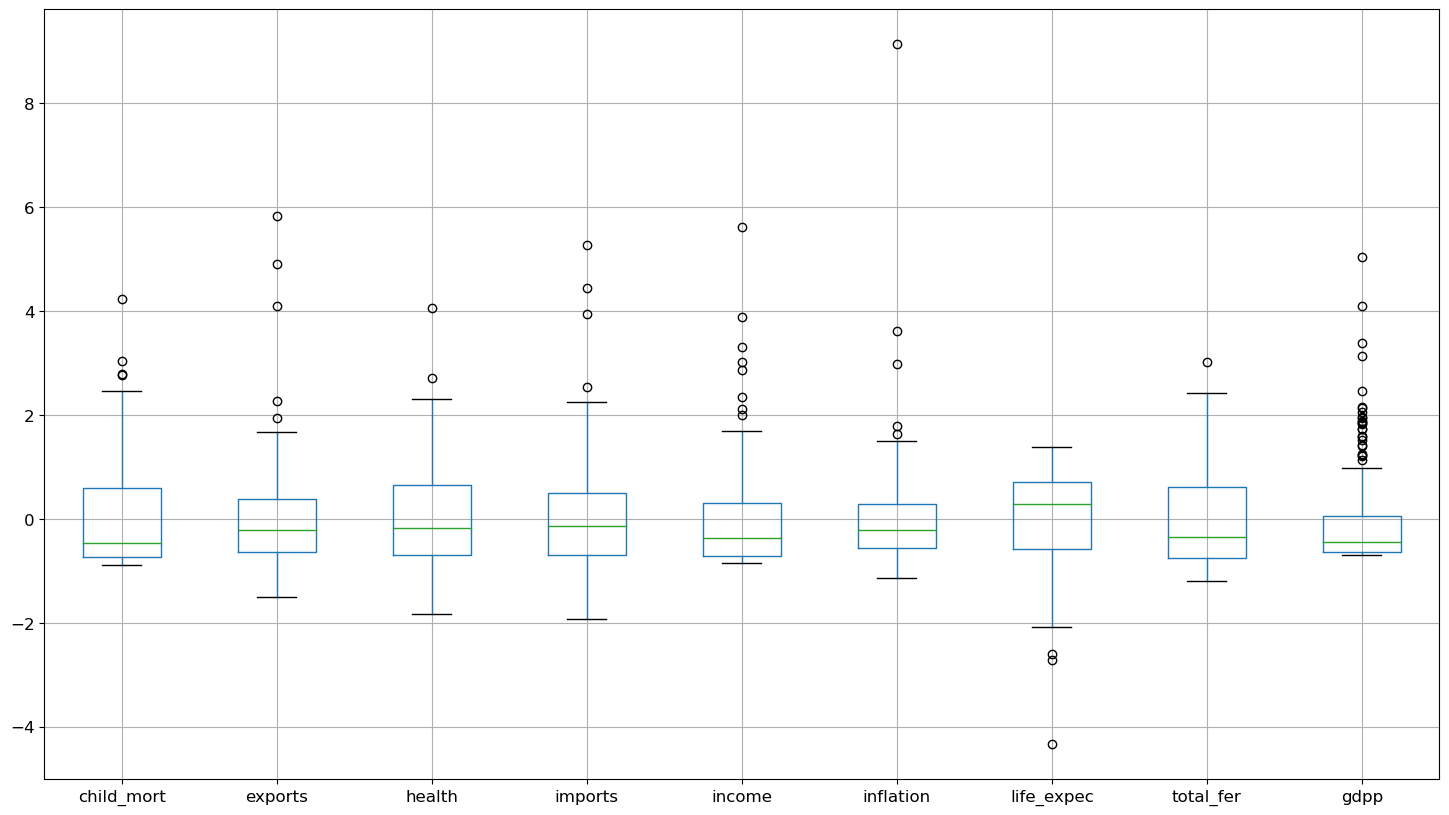

In [165]:
sData.boxplot(fontsize = 'large', figsize = (18, 10))

Principal component Analysis (PCA)

This is a statistical procedure that sumarizied the information content in large data tables by means of a smaller set of "summary indicies" That can be more easily visualition and analyzed.

In [166]:
from sklearn.decomposition import PCA 
pca = PCA()
pcaData = pd.DataFrame(pca.fit_transform(sData))
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

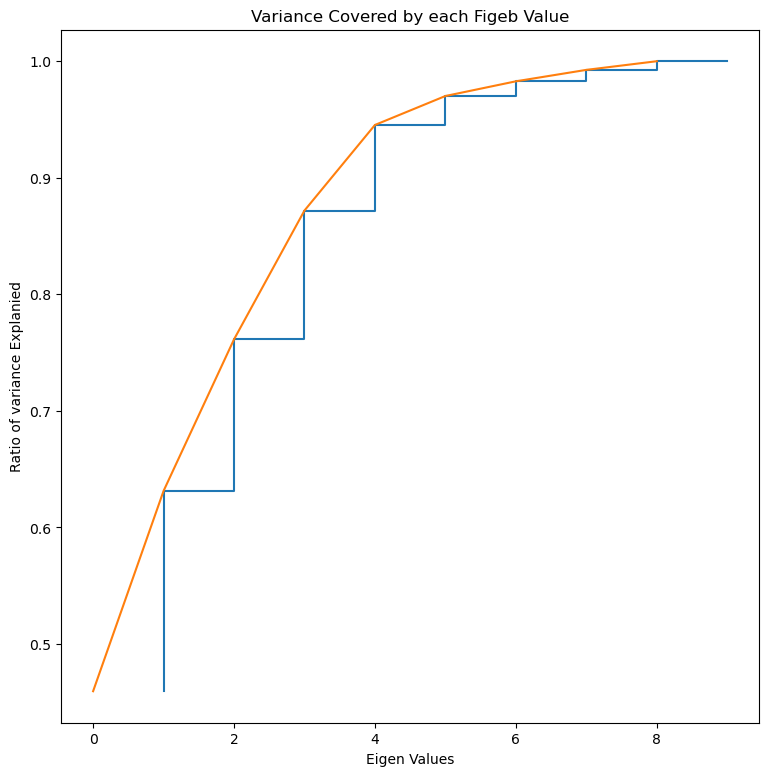

In [167]:
plt.rcParams['figure.figsize'] = 9, 9
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of variance Explanied')
plt.title('Variance Covered by each Figeb Value')
plt.show()

Variance covered tapers off after the Eigen  value. it covers more than 90% of the variance. So i will use these 4 values moving forward.

In [168]:
pcaData.drop(columns = [4,5,6,7,8], inplace = True)
pcaData.head()

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


Finding optimal number of clusters using Elbow method:

Elbow meethod on PCA Data:

Checking of the outliear in each  columns 

In [ ]:
# checking outlirs at 25%, 50%, 75%, 90%, 95% and 99% 
data_main.describe(percentiles=[.25,.5,.75,.90,.95,.99])

lets plot the box plots to check outliers 

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=data_main)
plt.show()

From the above table, we can see there are some outliers in case of exports, imports income,gdpp, etc. We will handle this after performing PCA to derive principle components after considering the elemenation of Country.

In [ ]:
print("The number of countries are : ",data_main.shape[0])

checking of null or NAN values

In [ ]:
data_main.isnull().sum()

As we can see there is no missing data(null,NaN values)in the list


let's plot the heat map to check the multicollinearity of the  variables 

In [ ]:
#plotting the correlation matrix
%matplotlib inline 
plt.figure(figsize = (20,10))
sns.heatmap(data_main.corr(),annot = True)
plt.show()

from above heatmap, we can see exports is highly correlated with import.health, export, income, imports are highly correlated with gdpp.So,it will be treated after performing PCA.

In [ ]:
## first let us see if we can explain the dataset using fewer variables 
from sklearn.preprocessing import StandardScaler
data_main1=data_main.drop('country',1) ## Droping string feature country name.
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data_main1)

performing PCA

In [ ]:
pca = PCA(svd_solver='randomized', random_state=42)

# fitting PCA on the dataset
pca.fit(data_scaled)

list of PCA components.

In [ ]:
pca.components_

In [ ]:
colnames = list(data_main1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

In [ ]:
%matplotlib inline 
fig = plt.figure(figsize = (9,9))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('principal components 1')
plt.ylabel('principal component 2')
for i, txt in enumerate(pcs_df.feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

from the above plot, we can see the first components is in the dirction where the import, exports, gdpp, income, health,life_expec are heavy and second component is in the dirction where child_most, total_fer is more.

These variable also have the highest of the loadings

performing incremental PCA 

In [ ]:
#Finally let's go ahead and do dimenstionality reduction using the four principale components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [ ]:
df_pca = pca_final.fit_transform(data_scaled)
df_pca.shape

creating a transpose so that the each columns is properly arranged 

In [ ]:
pc = np.transpose(df_pca)

creating correlation matrix for the principale components

In [ ]:
corrmat = np.corrcoef(pc)

plotting the correlation matrix of the principale components 

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=

Creating the dataframe of all 5 principal components

In [ ]:
pcs_df2 = pd.Dataframe({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]}) 

In [ ]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

checking outlier of all the principal compinents

In [ ]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

In [ ]:
pcs_df2.shape

In [ ]:
pcs_df2.head()

In [ ]:
#Visualising the points on the PCs.
# one of the prime advatages of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1' ,y='PC2' ,data=pcs_df2)
plt.show()

Clustering Process

let's go ahead and being with the clustering process i.e first we are calculating the Hopkins statistic

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform 
import numpy as np 
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape
        (1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
        H = sum(ujd) / (sum(ujd) + sum(wjd))
        if isnan(H):
            print(ujd, wjd)
            H = 0
            
        return H

In [ ]:
pcs_df2.info()

lets check the Hopkins measure

In [ ]:
hopkins(pcs_df2)

In [ ]:
pcs_df2.shape

In [ ]:
data3_1 = pcs_df2

performing k-means Clustering 

first we'll do the silhouette score analysis

In [ ]:
from sklearn.metrics import silhouette_score 
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data3_1)
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data3_1)
    sse_.append([k, silhouette_score(data3_1, kmeans.labels_)])

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

Checking with elbow curve

In [ ]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(data3_1)
    ssd.append(model_clus.inertia_)
    
    plt.plot(ssd)
    plt.show()

Again we are doing silhouette Analysis with scores

In [ ]:
# silhouette analysis 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_cluster in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(data3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score 
    silhouette_avg = silhouette_score(data3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

In [ ]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(data3_1)

In [170]:
data4=pcs_df2
data4.index = pd.RangeIndex(len(data4.index))
data_km = pd.concat([data4, pd.Series(model_clus2.labels_)], axis=1)
data_km.columns = ['PC1','PC2','PC3','PC4','PC5','ClusterID']
data_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2
...,...,...,...,...,...,...
162,-0.820753,0.636404,-0.379488,-0.706886,-0.400381,2
163,-0.549894,-1.215018,3.074556,-0.108594,2.114025,2
164,0.498570,1.392777,-0.252849,-1.085037,1.156471,2
165,-1.887294,-0.105397,1.107639,0.062636,0.665467,1


In [171]:
data_km['ClusterID'].value_counts()

2    84
1    47
0    36
Name: ClusterID, dtype: int64

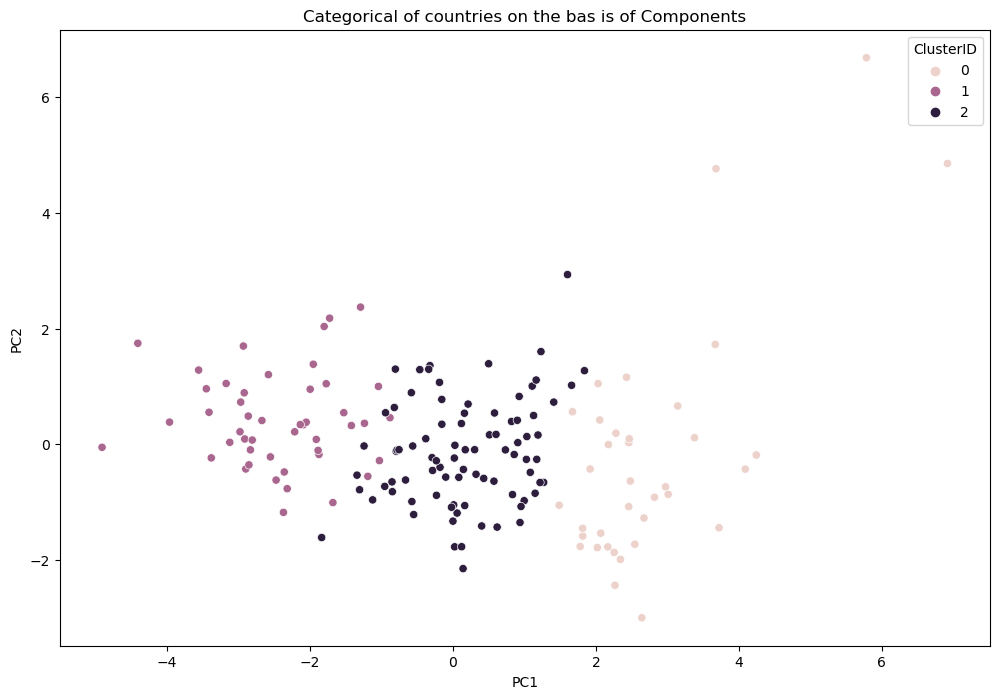

In [172]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=data_km)

plt.title('Categorical of countries on the bas is of Components')
plt.show()

From above plots we can clearly see the 3 clusters.

Now we are merging clusters with the original dataset.

In [192]:
data5=pd.merge(data_main,data_km, left_index=True,right_index=True)
data5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


So we have performed the clustering using the PCs and have now allocated the clusterIDs back to GDPP, child_mort, income of the datapoints

Analysis of the clusters

calculating the mean of all the variables of each clusters.

In [225]:
Cluster_GDPP=pd.DataFrame(data5.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(data5.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(data5.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(data5.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(data5.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(data5.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(data5.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(data5.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(data5.groupby(["ClusterID"]).total_fer.mean())


In [224]:
Cluster_GDPP=pd.DataFrame(data5.groupby(["ClusterID"]).gdpp.mean())

Concatenating all the grouped by data create a new dataframe to find required mean.

In [226]:
df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

creating a dataframe of mean of all the variables of all the clusters 

In [228]:
df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
Developed Countries,42494.444444,5.000000,45672.222222,58.738889,8.807778,51.491667,2.671250,80.127778,1.752778
Developing Countries,1922.382979,92.961702,3942.404255,29.151277,6.388511,42.323404,12.019681,59.187234,5.008085
Under-developed Countries,6486.452381,21.927381,12305.595238,40.243917,6.200952,47.473404,7.600905,72.814286,2.307500


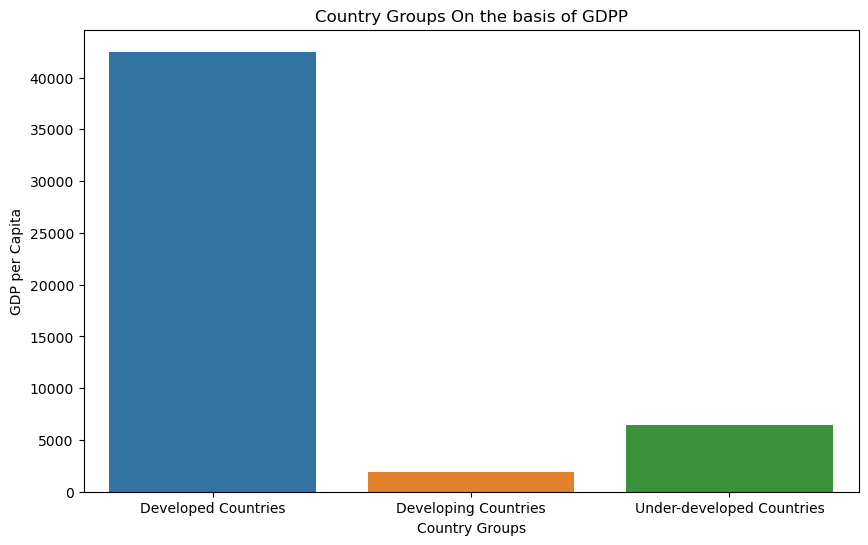

In [236]:
fig = plt.figure(figsize = (10,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='GDPP',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

Analysing the clustersing by comparing how the [gdpp, child_mort and income]vary for each cluster of countries to recognise and differntiate the clusters of developed countries from the cluster of under developed countries .

From above dataframe of means, we got the mean data of under -developed countries. so, creating a dataframe on the basic of same.


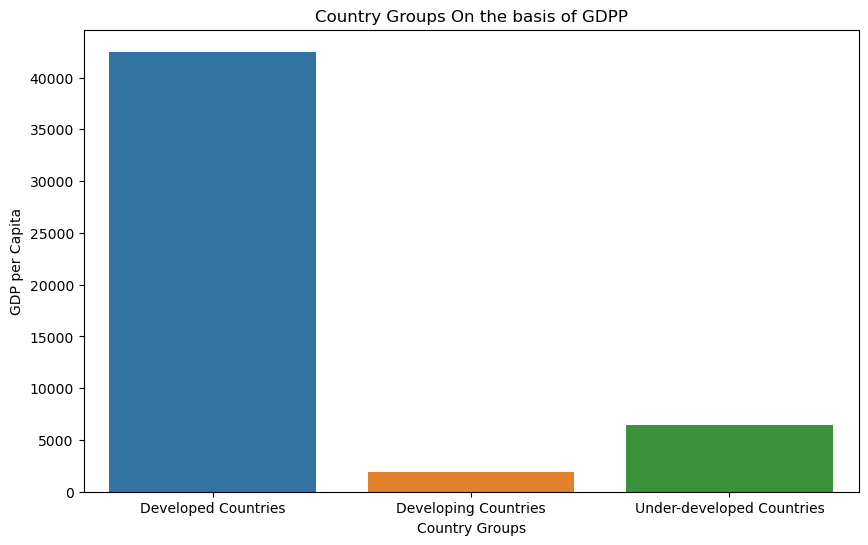

In [229]:
fig = plt.figure(figsize = (10,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='GDPP',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()


Above bar chart shows that, all the developed countries are having high  GDp per capita values, developing countries are having average gdp per capita values and poor countries are having least GDPP vlues,

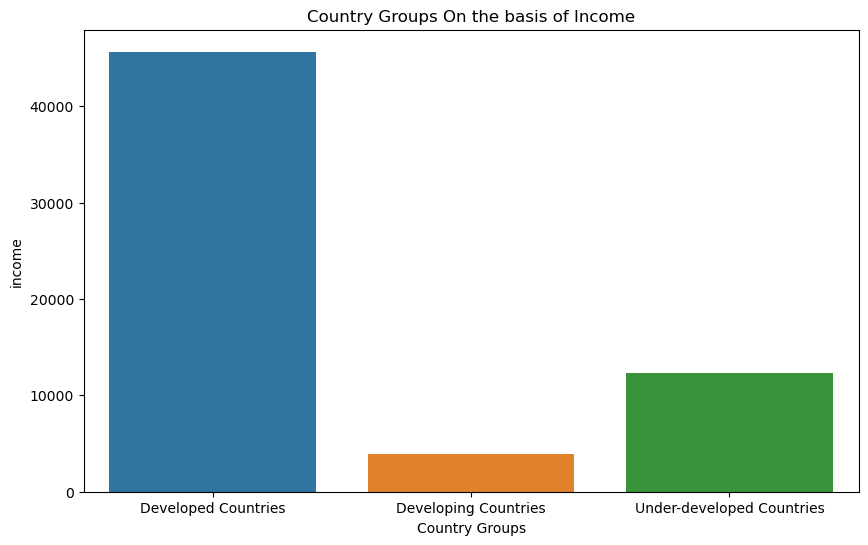

In [230]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='income',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()

Similarly , Above bar chart shows, that , all the developed countries are having high incomes per person, developing countries are having average income per person and poor cointries are having the least income per persons .

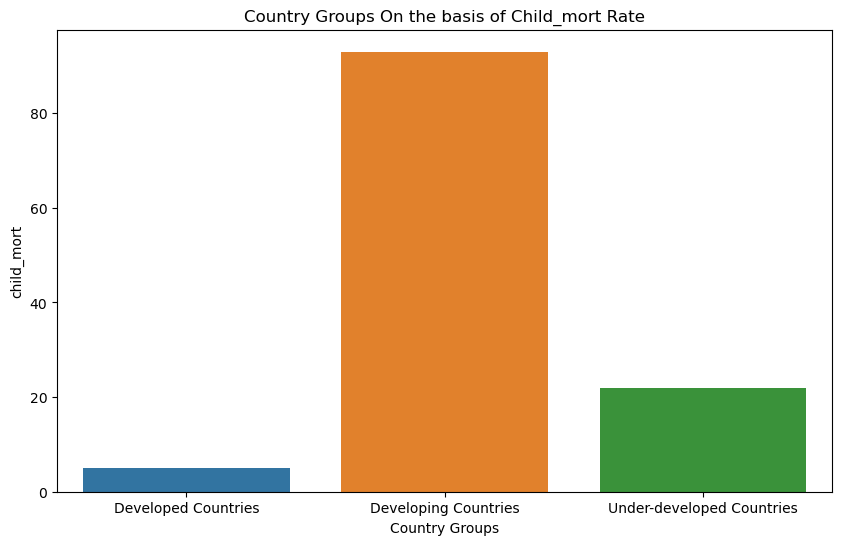

In [231]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='child_mort',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

So, Above bar chart shows that all the developed countries are having low number of death of childern under 5 year of age per 1000 live births, developing counries are having average death rate and poor countries are having the least death rate .

merging to get the cluster ids 

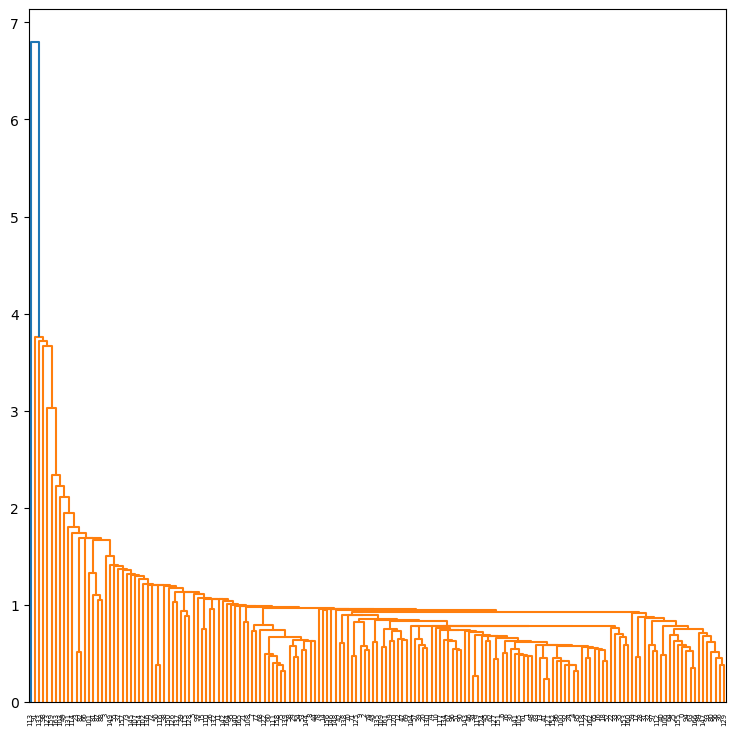

In [198]:
mergings=linkage(pcs_df2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

performing complete linkage

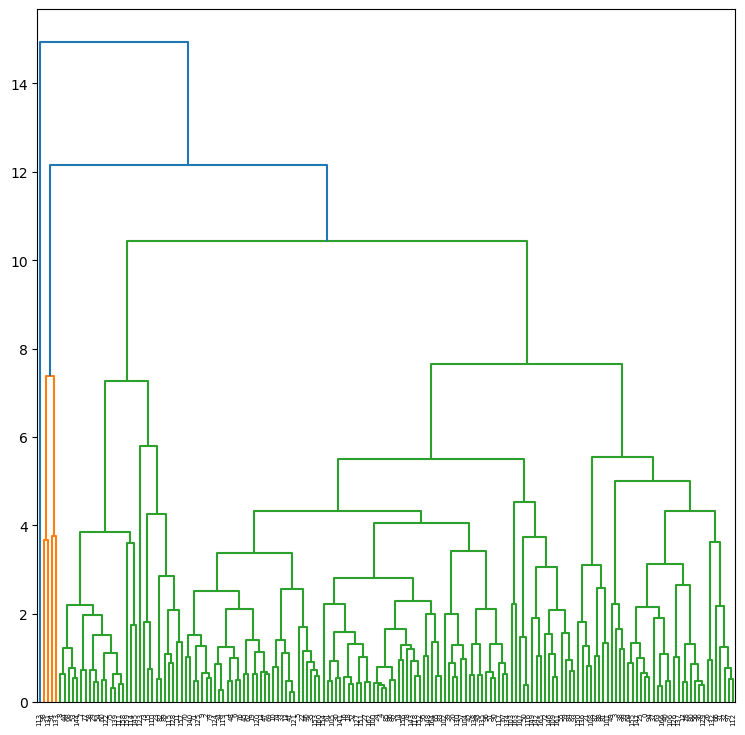

In [199]:
#mergings=linkage(fin,method='complete',metric='euclidean')
mergings=linkage(pcs_df2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

From above dendrogrms we can derive the 3 cluster.

In [200]:
cut_tree(mergings,n_clusters=3).shape

(167, 1)

let's reshape the cut_tree result array

In [201]:
cluser_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluser_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [203]:
#assign cluster labels

data_km['Cluster_lables']=cluser_labels
data_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2,0


In [207]:
data7=pd.merge(data_main,data_km, left_index=True,right_index=True)
data7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2,0


In [209]:
data8=data7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
data8.shape

(167, 12)

In [210]:
data8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


Analysis of the clusters

In [212]:
Cluster_GDPP_H=pd.DataFrame(data8.groupby(["Cluster_lables"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(data8.groupby(["Cluster_lables"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(data8.groupby(["Cluster_lables"]).income.mean())

In [213]:
df_H = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)

In [214]:
df_H.columns = ["GDPP","child_mort","income"]
df_H

,GDPP,child_mort,income
Cluster_lables,,,
0,12217.185185,38.483333,16330.32716
1,45875.000000,6.700000,53125.00000
2,2330.000000,130.000000,5150.00000


filtering the final list of Under- developed Countries where more funding is requered.